---

# RSI study of  10 Years of INTC Daily Data

---


In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
def _ta_RSI(df, n=14):
    # https://github.com/wgong/mplfinance/blob/master/examples/rsi.py
#     diff = df.Close.diff().values
    diff = df.w_p.diff().values
    gains = diff
    losses = -diff
    with np.errstate(invalid='ignore'):
        gains[(gains<0)|np.isnan(gains)] = 0.0
        losses[(losses<=0)|np.isnan(losses)] = 1e-10 # we don't want divide by zero/NaN
    m = (n-1) / n
    ni = 1 / n
    g = gains[n] = np.nanmean(gains[:n])
    l = losses[n] = np.nanmean(losses[:n])
    gains[:n] = losses[:n] = np.nan
    for i,v in enumerate(gains[n:],n):
        g = gains[i] = ni*v + m*g
    for i,v in enumerate(losses[n:],n):
        l = losses[i] = ni*v + m*l
    rs = gains / losses
#     df['rsi'] = 100 - (100/(1+rs))
    return 100 - (100/(1+rs))

In [4]:
df = pd.read_csv('data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(2335, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-06,28.25,28.450001,28.040001,28.270000,19.368675,70147800
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


In [5]:
LEN = df.shape[0]
SPAN = 120

In [6]:
ix_start, ix_stop = (-LEN) , (-LEN+SPAN)
df_1 = df.iloc[ix_start : ix_stop]
df_1.shape
df_1

(120, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000
1995-01-06,4.007813,4.070313,4.000000,4.062500,2.722212,56316800
1995-01-09,4.054688,4.125000,4.054688,4.125000,2.764089,75056000
...,...,...,...,...,...,...
1995-06-16,7.218750,7.335938,7.156250,7.257813,4.870484,122411200
1995-06-19,7.312500,7.765625,7.296875,7.718750,5.179803,127876000
1995-06-20,7.921875,8.140625,7.828125,8.125000,5.452423,141030400


In [7]:
df.iloc[ix_start].name, df.iloc[ix_stop-1].name

(Timestamp('1995-01-03 00:00:00'), Timestamp('1995-06-22 00:00:00'))

Interesting that iloc slicing is exclusive, but loc slicing is inclusive

In [8]:
df_2 = df.loc[df.iloc[ix_start].name : df.iloc[ix_stop-1].name] 
df_2.shape
df_2

(120, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000
1995-01-06,4.007813,4.070313,4.000000,4.062500,2.722212,56316800
1995-01-09,4.054688,4.125000,4.054688,4.125000,2.764089,75056000
...,...,...,...,...,...,...
1995-06-16,7.218750,7.335938,7.156250,7.257813,4.870484,122411200
1995-06-19,7.312500,7.765625,7.296875,7.718750,5.179803,127876000
1995-06-20,7.921875,8.140625,7.828125,8.125000,5.452423,141030400


---

#### We can, of course, plot a basic ohlc or candlestick plot:

In [9]:
import mplfinance as mpf
mpf.__version__
# mpf.plot(df,volume=True,type='candle')

'0.12.8b9'

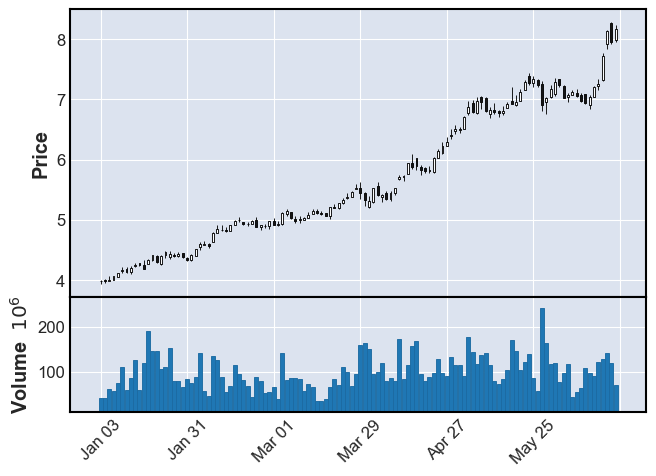

In [10]:
mpf.plot(df_1,volume=True,type='candle')

In [11]:
RSI_PERIOD, RSI_AVG = 100, 25
band_width = 0.6
EMA_FAST, EMA_SLOW, EMA_LONG = 15, 50, 150
EMA_FAST_SCALE = 1.1  # EMA10 band half-width factor
EMA_SLOW_SCALE = 2.0 

In [12]:

df["w_p"] = 0.25*(2*df["Close"] + df["High"] + df["Low"])
df["ema_fast"] = df.w_p.ewm(span=EMA_FAST).mean()
df["ema_slow"] = df.w_p.ewm(span=EMA_SLOW).mean()
df["ema_long"] = df.w_p.ewm(span=EMA_LONG).mean()

# range
hl_mean_fast = (df.High - df.Low).ewm(span=int(EMA_FAST/2)).mean()
df["ema_fast_u"] =  df.ema_fast + 0.5*hl_mean_fast * EMA_FAST_SCALE
df["ema_fast_d"] =  df.ema_fast - 0.5*hl_mean_fast * EMA_FAST_SCALE

hl_mean_slow = (df.High - df.Low).ewm(span=int(EMA_SLOW/2)).mean()
df["ema_slow_u"] =  df.ema_slow + 0.5*hl_mean_slow * EMA_SLOW_SCALE
df["ema_slow_d"] =  df.ema_slow - 0.5*hl_mean_slow * EMA_SLOW_SCALE
df["rsi"] = _ta_RSI(df,n=RSI_PERIOD)
df["rsi_avg"] = df.rsi.ewm(span=RSI_AVG).mean()
df["rsi_u"] = df["rsi_avg"] + band_width
df["rsi_d"] = df['rsi_avg'] - band_width
df["rsi_50"] = 50

In [13]:
SPAN = 200
OVERLAP = 40
intervals = []
for ix_stop in range(LEN, RSI_PERIOD, -SPAN):
    ix_start = ix_stop - SPAN -int(OVERLAP/2)
    intervals.append((ix_start if ix_start > 0 else 0, ix_stop+int(OVERLAP/2)))
#     df_1 = df.iloc[ix_start : ix_stop]
    # df_1.shape
#     print(f"chart-{num}")
#     df_1

In [19]:
num = 0
FIGURE_WIDTH, FIGURE_HEIGHT =  16, 14
for ix_start,ix_stop in intervals[::-1]:
    num += 1
    
#     if num > 2:  break
        
    df_1 = df.iloc[ix_start : ix_stop]
    
    light_black = '#8F8E83'
    # ema_fast_plot = mpf.make_addplot(df_1["ema_fast"], panel=0, color='c', linestyle="dashed")
    ema_fast_u_plot = mpf.make_addplot(df_1["ema_fast_u"], panel=0, color=light_black, linestyle="solid")
    ema_fast_d_plot = mpf.make_addplot(df_1["ema_fast_d"], panel=0, color=light_black, linestyle="solid")
    ema_slow_plot = mpf.make_addplot(df_1["ema_slow"], panel=0, color='red', linestyle="solid")
#     ema_slow_u_plot = mpf.make_addplot(df_1["ema_slow_u"], panel=0, color='b')
#     ema_slow_d_plot = mpf.make_addplot(df_1["ema_slow_d"], panel=0, color='b')
    ema_long_plot = mpf.make_addplot(df_1["ema_long"], panel=0, width=3, color='b')  # magenta
    
    rsi_min = df_1.min(axis=0)[["rsi"]].min()
    rsi_max = df_1.max(axis=0)[["rsi"]].max()
    rsi_50_color = "#F0DC16"  # yellow
    if rsi_min >= 50:
        df_1["rsi_50"] = rsi_min
        rsi_50_color = "g"
    if rsi_max <= 50:
        df_1["rsi_50"] = rsi_max
        rsi_50_color = "r"
    rsi_50_plot = mpf.make_addplot(df_1["rsi_50"], panel=1, color=rsi_50_color, width=3, linestyle="solid", 
                                   ylim=(rsi_min,rsi_max))
    rsi_plot = mpf.make_addplot(df_1["rsi"], panel=1, color='black', width=1, title="INTC-RSI",
                                fill_between=dict(y1=df_1["rsi_d"].values,y2=df_1["rsi_u"].values,alpha=0.15,color='b'),
                                ylim=(rsi_min,rsi_max))
    rsi_avg_plot = mpf.make_addplot(df_1["rsi_avg"], panel=1, color='red', linestyle="dashed", 
                                    ylim=(rsi_min,rsi_max))
#     rsi_u_plot = mpf.make_addplot(df_1["rsi_u"], panel=1, color='b', ylim=(rsi_min,rsi_max))
#     rsi_d_plot = mpf.make_addplot(df_1["rsi_d"], panel=1, color='b', ylim=(rsi_min,rsi_max))

    plots = [
            # panel-0
            ema_fast_u_plot, ema_fast_d_plot, 
            ema_slow_plot, ema_long_plot , # ema_slow_u_plot, ema_slow_d_plot, 
            # panel-1
            rsi_50_plot, rsi_plot, rsi_avg_plot # , rsi_u_plot, rsi_d_plot 
        ]

    file_img = f"images/INTC-{num}.png"
    print(file_img)
    mpf.plot(df_1, type='candle', 
            style='yahoo', 
            fill_between=dict(y1=df_1["ema_slow_d"].values,y2=df_1["ema_slow_u"].values,alpha=0.15,color='b'),
            panel_ratios=(4,4),
            # mav=(EMA_FAST), 
            addplot=plots, 
#             title=_title_xy(ticker),
#             volume=True, volume_panel=2, 
            ylabel="", ylabel_lower='',
            xrotation=0,
            datetime_format='%Y-%m-%d',
            savefig=file_img,
            figsize=(FIGURE_WIDTH,FIGURE_HEIGHT),
            tight_layout=True,
            show_nontrading=True
        )    
    
        # mpf.plot(df_1,type='candle',volume=False,figscale=1.5,addplot=plots,panel_ratios=(1,1.5), 
        # xrotation=20, datetime_format='%Y-%m-%d')

<ipython-input-19-681bd7e89dc6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["rsi_50"] = rsi_min


images/INTC-1.png
images/INTC-2.png


<ipython-input-19-681bd7e89dc6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["rsi_50"] = rsi_min


images/INTC-3.png
images/INTC-4.png
images/INTC-5.png
images/INTC-6.png
images/INTC-7.png
images/INTC-8.png
images/INTC-9.png
images/INTC-10.png
images/INTC-11.png
images/INTC-12.png


## resample